
## 梯度下降


是一種優化算法,用於最小化損失函數。以下是梯度下降的數學表示:


1. 損失函數:
   假設我們有一個損失函數 J(θ), 其中 θ 是參數向量。我們的目標是找到使 J(θ) 最小的 θ。

2. 梯度:
   梯度是損失函數對參數的偏導數:
   ∇J(θ) = [∂J/∂θ₁, ∂J/∂θ₂, ..., ∂J/∂θₙ]

3. 更新規則:
   θ(t+1) = θ(t) - α∇J(θ(t))
   
   其中:
   - θ(t) 是第 t 次迭代時的參數值
   - α 是學習率 (一個正數)
   - ∇J(θ(t)) 是在 θ(t) 處的梯度

4. 迭代過程:
   重複步驟 3 直到收斂或達到預定的迭代次數。

5. 收斂條件:
   通常,當 ||θ(t+1) - θ(t)|| < ε 時,我們認為算法收斂,其中 ε 是一個很小的正數。

對於您之前提供的一維例子,我們可以更具體地表示:

1. 損失函數: J(x) = x² + 5x + 10

2. 梯度: J'(x) = 2x + 5

3. 更新規則: x(t+1) = x(t) - α(2x(t) + 5)

這個過程會不斷重複,直到 x 的值收斂到最小點附近。

在多維情況下,原理相同,但我們需要考慮所有參數的偏導數。例如,對於二維函數 J(x,y),更新規則會是:

x(t+1) = x(t) - α * ∂J/∂x
y(t+1) = y(t) - α * ∂J/∂y

梯度下降的效率和收斂性很大程度上取決於學習率 α 的選擇。太大可能導致發散,太小則收斂速度慢。在實踐中,常常使用自適應學習率或其他改進版本的梯度下降算法,如隨機梯度下降(SGD)、Adam等。


In [4]:
# 導入numpy庫，用於數值計算
import numpy as np
# 導入matplotlib.pyplot庫，用於繪圖
import matplotlib.pyplot as plt

# 定義損失函數
def loss_function(x):
    # 返回二次函數 x^2 + 5x + 10
    return x**2 + 5*x + 10

# 定義梯度函數
def gradient(x):
    # 返回損失函數的導數 2x + 5
    return 2*x + 5

# 梯度下降算法
def gradient_descent(learning_rate, num_iterations):
    # 初始化x為0
    x = 0  # 初始點
    # 創建一個列表來存儲x的歷史值
    x_history = [x]
    
    # 迭代指定的次數
    for _ in range(num_iterations):
        # 計算當前點的梯度
        grad = gradient(x)
        # 更新x的值
        x = x - learning_rate * grad
        # 將新的x值添加到歷史記錄中
        x_history.append(x)
    
    # 返回最終的x值和x的歷史記錄
    return x, x_history


In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'SimSun', 'NSimSun', 'FangSong', 'KaiTi']


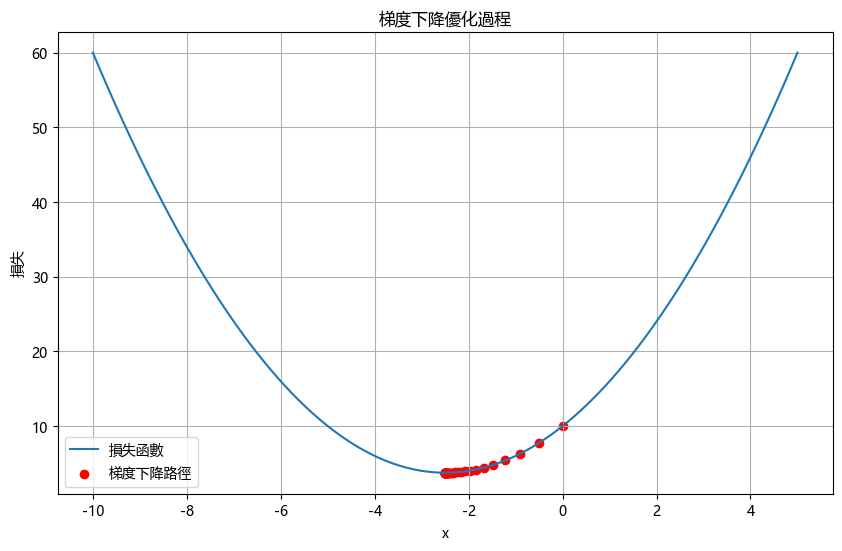

最優解: x = -2.5000, 最小損失 = 3.7500


In [9]:

# 執行梯度下降
learning_rate = 0.1
num_iterations = 50
optimal_x, x_history = gradient_descent(learning_rate, num_iterations)

# 計算並列印梯度值
gradient_values = [gradient(x) for x in x_history]
print("梯度值:")
for i, grad in enumerate(gradient_values):
    print(f"迭代 {i}: {grad:.4f}")


In [ ]:

# 繪製結果
x_range = np.linspace(-10, 5, 100)
y_range = loss_function(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label='損失函數')
plt.scatter(x_history, [loss_function(x) for x in x_history], c='r', label='梯度下降路徑')
plt.xlabel('x')
plt.ylabel('損失')
plt.title('梯度下降優化過程')
plt.legend()
plt.grid(True)
plt.show()

print(f"最優解: x = {optimal_x:.4f}, 最小損失 = {loss_function(optimal_x):.4f}")